In [27]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [28]:
from keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib as plt
import numpy as np
import tifffile as tiff
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.applications import DenseNet121
from keras.layers import Dense, GlobalAveragePooling2D, Dropout,Conv2D
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras import optimizers
import tensorflow as tf

In [29]:
# create an ImageDataGenerator object with TIFF image format
datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last', dtype='float32',validation_split=0.2)

# read TIFF images from a directory
train_data = datagen.flow_from_directory(directory="/content/gdrive/MyDrive/TCGA",
                                        target_size=(224, 224),
                                        class_mode='sparse',
                                        color_mode='rgb',
                                        classes = ['TCGA-BRCA','TCGA-COAD','TCGA-LUSC','TCGA-SKCM'],
                                        batch_size=32,
                                        save_to_dir=None,
                                        save_prefix='',
                                        save_format='tiff',
                                        follow_links=False,
                                        subset='training',
                                        shuffle=True,
                                        interpolation='nearest')
# read TIFF images from a directory
val_data = datagen.flow_from_directory(directory="/content/gdrive/MyDrive/TCGA",
                                        target_size=(224, 224),
                                        class_mode='sparse',
                                        color_mode='rgb',
                                        classes = ['TCGA-BRCA','TCGA-COAD','TCGA-LUSC','TCGA-SKCM'],
                                        batch_size=32,
                                        save_to_dir=None,
                                        save_prefix='',
                                        save_format='tiff',
                                        follow_links=False,
                                        subset='validation',
                                        shuffle=False,
                                        interpolation='nearest')



print('Training', train_data)
print('Validation', val_data)

/usr/local/lib/python3.8/dist-packages/keras/preprocessing/image.py:193: UserWarning: Using ".tiff" files with multiple bands will cause distortion. Please verify your output.
  warnings.warn('Using ".tiff" files with multiple bands '


Found 5722 images belonging to 4 classes.
Found 1430 images belonging to 4 classes.
Training <keras.preprocessing.image.DirectoryIterator object at 0x7fb4fd947580>
Validation <keras.preprocessing.image.DirectoryIterator object at 0x7fb4fddc90a0>


In [30]:
train_data.labels

array([0, 0, 0, ..., 3, 3, 3], dtype=int32)

In [31]:
type(train_data)

keras.preprocessing.image.DirectoryIterator

https://www.analyticsvidhya.com/blog/2020/08/image-augmentation-on-the-fly-using-keras-imagedatagenerator/

## Rotation

/usr/local/lib/python3.8/dist-packages/keras/preprocessing/image.py:193: UserWarning: Using ".tiff" files with multiple bands will cause distortion. Please verify your output.
  warnings.warn('Using ".tiff" files with multiple bands '


Found 7152 images belonging to 4 classes.


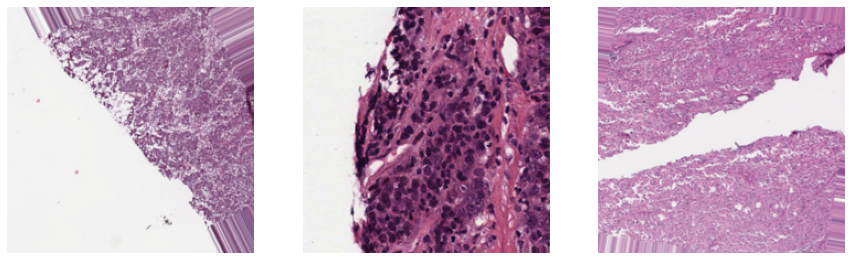

In [45]:
# ImageDataGenerator shifting
datagen_test = ImageDataGenerator(rotation_range=30, fill_mode='nearest')

# iterator
train_data_test = datagen_test.flow_from_directory(directory="/content/gdrive/MyDrive/TCGA",
                                        target_size=(224, 224),
                                        class_mode='sparse',
                                        color_mode='rgb',
                                        classes = ['TCGA-BRCA','TCGA-COAD','TCGA-LUSC','TCGA-SKCM'],
                                        batch_size=1,
                                        save_to_dir=None,
                                        save_prefix='',
                                        save_format='tiff',
                                        follow_links=False,
                                        subset='training',)

# generate samples and plot
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

# generate batch of images
for i in range(3):

	# convert to unsigned integers
	image = next(train_data_test)[0].astype('uint8')
 
	# plot image
	ax[i].imshow(image[0])
	ax[i].axis('off')

## Shifts

Found 7152 images belonging to 4 classes.


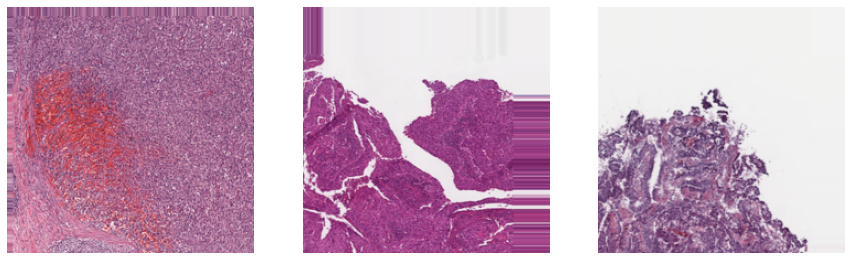

In [46]:
# ImageDataGenerator shifting
datagen_test = ImageDataGenerator(width_shift_range=0.2, height_shift_range=0.2)

# iterator
train_data_test = datagen_test.flow_from_directory(directory="/content/gdrive/MyDrive/TCGA",
                                        target_size=(224, 224),
                                        class_mode='sparse',
                                        color_mode='rgb',
                                        classes = ['TCGA-BRCA','TCGA-COAD','TCGA-LUSC','TCGA-SKCM'],
                                        batch_size=1,
                                        save_to_dir=None,
                                        save_prefix='',
                                        save_format='tiff',
                                        follow_links=False,
                                        subset='training',)

# generate samples and plot
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

# generate batch of images
for i in range(3):

	# convert to unsigned integers
	image = next(train_data_test)[0].astype('uint8')
 
	# plot image
	ax[i].imshow(image[0])
	ax[i].axis('off')

## Flips

/usr/local/lib/python3.8/dist-packages/keras/preprocessing/image.py:193: UserWarning: Using ".tiff" files with multiple bands will cause distortion. Please verify your output.
  warnings.warn('Using ".tiff" files with multiple bands '


Found 7152 images belonging to 4 classes.


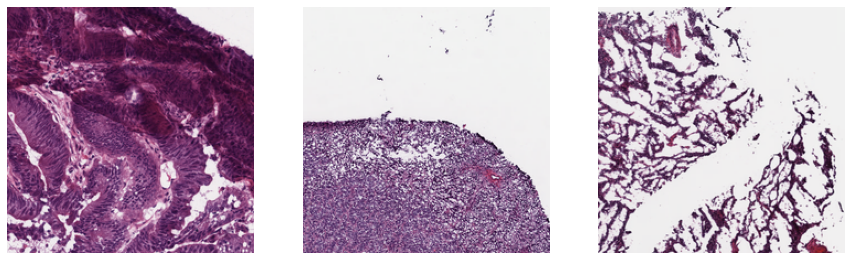

In [47]:
# ImageDataGenerator shifting
datagen_test = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)

# iterator
train_data_test = datagen_test.flow_from_directory(directory="/content/gdrive/MyDrive/TCGA",
                                        target_size=(224, 224),
                                        class_mode='sparse',
                                        color_mode='rgb',
                                        classes = ['TCGA-BRCA','TCGA-COAD','TCGA-LUSC','TCGA-SKCM'],
                                        batch_size=1,
                                        save_to_dir=None,
                                        save_prefix='',
                                        save_format='tiff',
                                        follow_links=False,
                                        subset='training',)

# generate samples and plot
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

# generate batch of images
for i in range(3):

	# convert to unsigned integers
	image = next(train_data_test)[0].astype('uint8')
 
	# plot image
	ax[i].imshow(image[0])
	ax[i].axis('off')

## Brightness

Found 7152 images belonging to 4 classes.


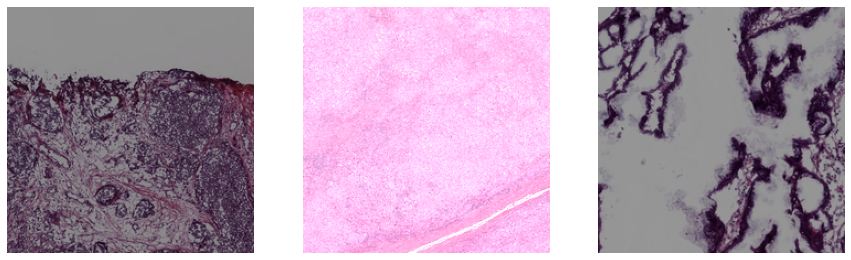

In [48]:
# ImageDataGenerator shifting
datagen_test = ImageDataGenerator(brightness_range=[0.4,1.5])

# iterator
train_data_test = datagen_test.flow_from_directory(directory="/content/gdrive/MyDrive/TCGA",
                                        target_size=(224, 224),
                                        class_mode='sparse',
                                        color_mode='rgb',
                                        classes = ['TCGA-BRCA','TCGA-COAD','TCGA-LUSC','TCGA-SKCM'],
                                        batch_size=1,
                                        save_to_dir=None,
                                        save_prefix='',
                                        save_format='tiff',
                                        follow_links=False,
                                        subset='training',)

# generate samples and plot
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

# generate batch of images
for i in range(3):

	# convert to unsigned integers
	image = next(train_data_test)[0].astype('uint8')
 
	# plot image
	ax[i].imshow(image[0])
	ax[i].axis('off')

## Zoom

Found 7152 images belonging to 4 classes.


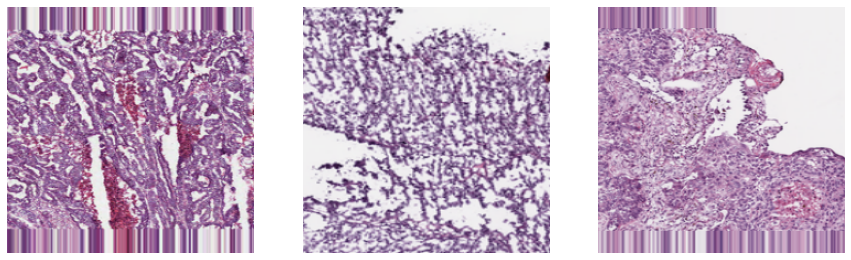

In [49]:
# ImageDataGenerator shifting
datagen_test = ImageDataGenerator(zoom_range=0.3)

# iterator
train_data_test = datagen_test.flow_from_directory(directory="/content/gdrive/MyDrive/TCGA",
                                        target_size=(224, 224),
                                        class_mode='sparse',
                                        color_mode='rgb',
                                        classes = ['TCGA-BRCA','TCGA-COAD','TCGA-LUSC','TCGA-SKCM'],
                                        batch_size=1,
                                        save_to_dir=None,
                                        save_prefix='',
                                        save_format='tiff',
                                        follow_links=False,
                                        subset='training',)

# generate samples and plot
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

# generate batch of images
for i in range(3):

	# convert to unsigned integers
	image = next(train_data_test)[0].astype('uint8')
 
	# plot image
	ax[i].imshow(image[0])
	ax[i].axis('off')

## Data set

/usr/local/lib/python3.8/dist-packages/keras/preprocessing/image.py:193: UserWarning: Using ".tiff" files with multiple bands will cause distortion. Please verify your output.
  warnings.warn('Using ".tiff" files with multiple bands '


Found 7152 images belonging to 4 classes.


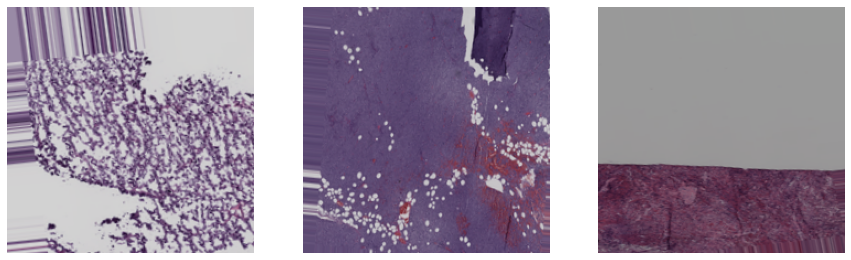

In [51]:
# ImageDataGenerator 
datagen_test = ImageDataGenerator(
                            rotation_range=10, # rotation
                            width_shift_range=0.2, # horizontal shift
                            height_shift_range=0.2, # vertical shift
                            zoom_range=0.2, # zoom
                            horizontal_flip=True, # horizontal flip
                            brightness_range=[0.2,1.2]) # brightness

# iterator
train_data_test = datagen_test.flow_from_directory(directory="/content/gdrive/MyDrive/TCGA",
                                        target_size=(224, 224),
                                        class_mode='sparse',
                                        color_mode='rgb',
                                        classes = ['TCGA-BRCA','TCGA-COAD','TCGA-LUSC','TCGA-SKCM'],
                                        batch_size=1,
                                        save_to_dir=None,
                                        save_prefix='',
                                        save_format='tiff',
                                        follow_links=False,
                                        subset='training',)

# generate samples and plot
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

# generate batch of images
for i in range(3):

	# convert to unsigned integers
	image = next(train_data_test)[0].astype('uint8')
 
	# plot image
	ax[i].imshow(image[0])
	ax[i].axis('off')

## Using in data set

In [ ]:
"""
# Directly use .flow()
model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size), 
                    epochs=epochs, # one forward/backward pass of training data
                    steps_per_epoch=x_train.shape[0]//batch_size, # number of images comprising of one epoch
                    validation_data=(x_test, y_test), # data for validation
                    validation_steps=x_test.shape[0]//batch_size)

# or use iterator from .flow_from_directory()
model.fit_generator(train_generator, 
                    epochs=epochs,  # one forward/backward pass of training data
                    steps_per_epoch=x_train.shape[0]//batch_size,  # number of images comprising of one epoch
                    validation_data=(x_test, y_test), # Or validation_data=valid_generator
                    validation_steps=x_test.shape[0]//batch_size
"""

## Keras 

In [ ]:
"""
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])
"""

In [ ]:
"""
IMG_SIZE = 180
resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMG_SIZE, IMG_SIZE),
  layers.Rescaling(1./255)
])
"""

In [ ]:
"""
model = tf.keras.Sequential([
  # Add the preprocessing layers you created earlier.
  resize_and_rescale,
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  # Rest of your model.
])
"""